3. Знайдіть функцію Лагранжа системи, для якої функція Гамільтона має вигляд

$$H = \frac{p_x^2+p_y^2+p_z^2}{2\,m} + \frac{c \sqrt{p_x^2+p_y^2+p_z^2}}{n} + \left(\vec{a}, \vec{p}\right)$$

Напишіть рівняння Ейлера-Лагранжа і Гамільтона, проаналізуйте отримані рывняння.

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

def displ(tex):
    display(Math(tex))

In [2]:
# Объявление переменных и функций

t = var("t")
m,n,c = var("m,n,c")

Vx = var("v_x")
vx = function("v_x")(t)
Vy = var("v_y")
vy = function("v_y")(t)
Vz = var("v_z")
vz = function("v_z")(t)


X = var("x")
Y = var("y")
Z = var("z")

x = function("x")(t)
y = function("y")(t)
z = function("z")(t)

P = var("p")
p = function("p")(t)

alpha = var("alpha")
F = var("F")

In [3]:
# Объявление переменных - обобщенные импульсы

p_x = var("p_x")
p_y = var("p_y")
p_z = var("p_z")

A_x = var("a_x")
A_y = var("a_y")
A_z = var("a_z")

# векторный потенциал
a_x = function("a_x")(X,Y,Z)
a_y = function("a_y")(X,Y,Z)
a_z = function("a_z")(X,Y,Z)

In [4]:
H = (p_x^2 + p_y^2 + p_z^2) / (2*m) + c * sqrt(p_x^2 + p_y^2 + p_z^2) / n + (a_x*p_x+a_y*p_y+a_z*p_z)
displ("H = " + latex(H))

<IPython.core.display.Math object>

Записываем уравнения Гамильтона

$\dot{p}_i = - \frac{\partial H}{\partial x_i}$

$\dot{x}_i = \frac{\partial H}{\partial p_i}$

In [5]:
dot_px = - H.subs(x == X).subs(y == Y).subs(z == Z).diff(X)
dot_py = - H.subs(x == X).subs(y == Y).subs(z == Z).diff(Y)
dot_pz = - H.subs(x == X).subs(y == Y).subs(z == Z).diff(Z)

dot_x = H.diff(p_x).subs(x == X).subs(y == Y).subs(z == Z)
dot_y = H.diff(p_y).subs(x == X).subs(y == Y).subs(z == Z)
dot_z = H.diff(p_z).subs(x == X).subs(y == Y).subs(z == Z)

In [6]:
displ("\\dot{p}_x =" + latex(dot_px))
displ("\\dot{p}_y =" + latex(dot_py))
displ("\\dot{p}_z =" + latex(dot_pz))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
displ("\\dot{x} =" + latex(dot_x))
displ("\\dot{y} =" + latex(dot_y))
displ("\\dot{z} =" + latex(dot_z))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
eq_dot_x = Vx == dot_x
eq_dot_y = Vy == dot_y
eq_dot_z = Vz == dot_z
disp(eq_dot_x)
disp(eq_dot_y)
disp(eq_dot_z)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
px_sol = solve(eq_dot_x, p_x)
py_sol = solve(eq_dot_y, p_y)
pz_sol = solve(eq_dot_z, p_z)
disp(px_sol)
disp(py_sol)
disp(pz_sol)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Выразим энергию через Гамильтониан

In [10]:
E = H.subs(px_sol) \
     .subs(py_sol) \
     .subs(pz_sol)# \
     #.subs(Vx == vx) \
     #.subs(Vy == vy) \
     #.subs(Vz == vz)
displ("H = " + latex(H))
displ("E = " + latex(E))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Выразим Лагранжиан через энергию 

$L = \Sigma_{i}^{} \frac {\partial L}{\partial \dot{q}_i} \frac {q_i}{dt} - E$

In [11]:
L = ((px_sol[0].rhs() * vx + py_sol[0].rhs() * vz + px_sol[0].rhs() * vz) - E)#.subs(V == v)
disp (L)

<IPython.core.display.Math object>

# Интегрирование уравнений Гамильтона

In [12]:
# полученные уравнения Гамильтона обьединяем в систему из 2 уравнений
des = [dot_px,dot_py,dot_pz, dot_x, dot_y, dot_z]
disp(des)

<IPython.core.display.Math object>

In [13]:
values = [c == 1, m == 1, n == 1]
values

[c == 1, m == 1, n == 1]

In [14]:
funcs = [a_x == X^2+Y^2+Z^2, a_y == X^2+Y^2+Z^2, a_z == X^2+Y^2+Z^2]
disp(funcs)

<IPython.core.display.Math object>

In [15]:
# в которой делаем подстановку численных значений
f1 = [de_i.subs(values) for de_i in des]
disp(f1)

<IPython.core.display.Math object>

In [16]:
# в которой делаем подстановку численных значений
f2 = [de_i.substitute_function(funcs) for de_i in f1]
disp(f2)

<IPython.core.display.Math object>

In [17]:
px0 = 1
py0 = 1
pz0 = 1
x0  = 0
y0  = 0
z0  = 0
ics = [px0,py0,pz0, x0,y0,z0]

In [18]:
dvars=[p_x, p_y, p_z, X, Y, Z]

In [19]:
# Solve numerically a system of first-order ordinary differential equations
# using odeint from scipy.integrate module.

# des – right hand sides of the system
# ics – initial conditions
# times – a sequence of time points in which the solution must be found
# dvars – dependent variables. ATTENTION: the order must be the same as in des, that means: d(dvars[i])/dt=des[i]
# ivar – independent variable, optional.

times = srange(0, 0.7, 0.000001)

sol1 = desolve_odeint(des=f2, ics=ics, times=times, dvars=dvars, ivar=t)

# Построение фазовых диаграмм ($p(x)$)

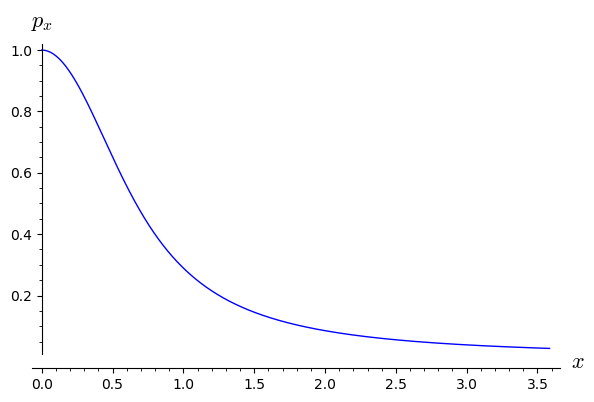

In [21]:
p = line(zip(sol1[:,3],sol1[:,0]), axes_labels=['$x$','$p_x$',])
p.show()

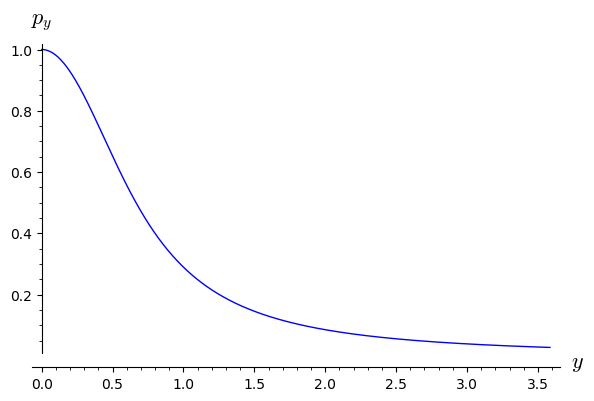

In [22]:
p = line(zip(sol1[:,4],sol1[:,1]), axes_labels=['$y$','$p_y$',])
p.show()

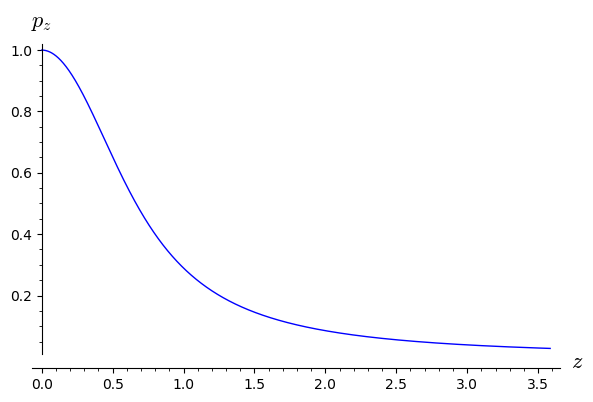

In [23]:
p = line(zip(sol1[:,5],sol1[:,2]), axes_labels=['$z$','$p_z$',])
p.show()

# Построение зависимости обобщённых координат и импульсов от времени

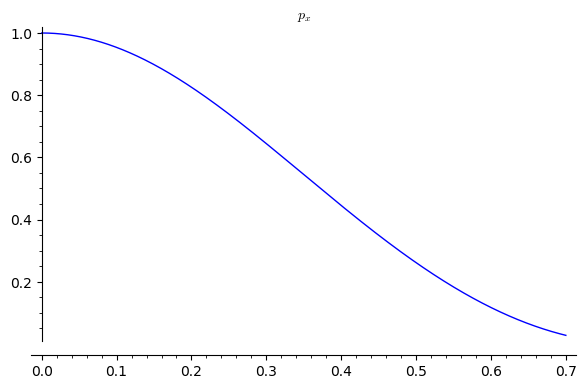

In [24]:
p = line(zip(times,sol1[:,0]))
p.show(title="$p_x$")

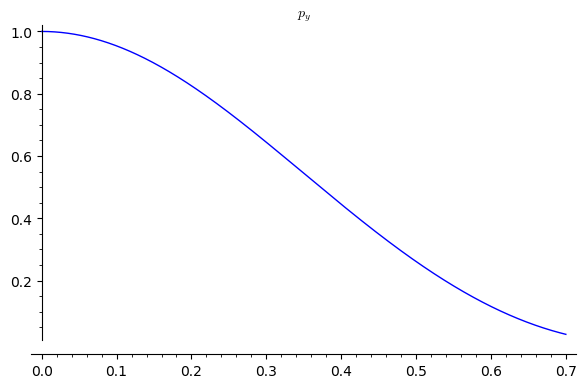

In [25]:
p = line(zip(times,sol1[:,1]))
p.show(title="$p_y$")

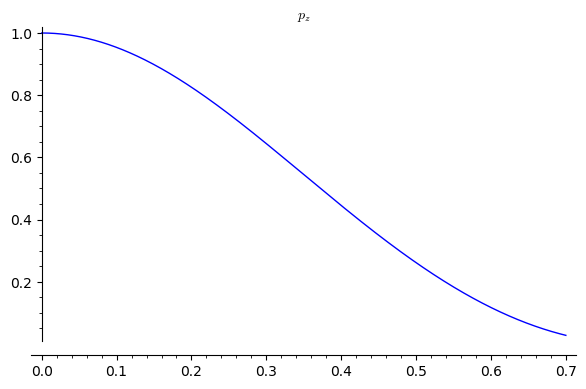

In [26]:
p = line(zip(times,sol1[:,2]))
p.show(title="$p_z$")

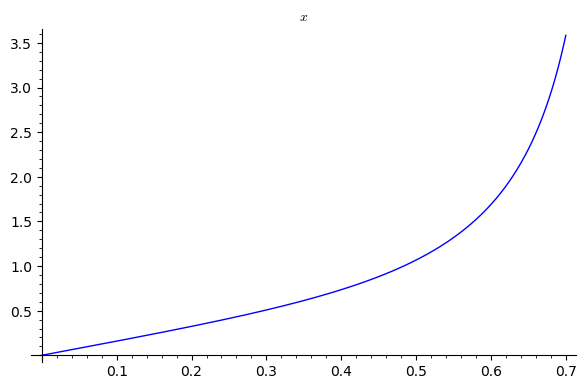

In [27]:
p = line(zip(times,sol1[:,3]))
p.show(title="$x$")

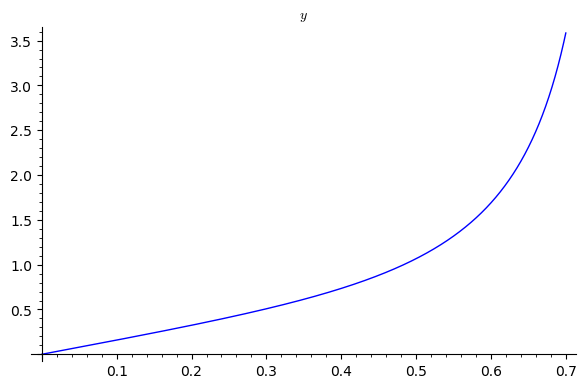

In [28]:
p = line(zip(times,sol1[:,4]))
p.show(title="$y$")

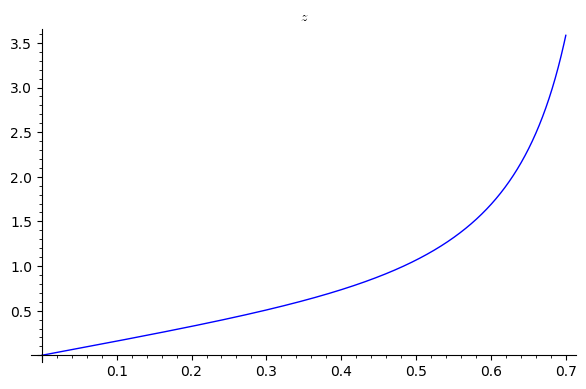

In [29]:
p = line(zip(times,sol1[:,5]))
p.show(title="$z$")